In [6]:
# 首先将数据存入Mongodb, 请确保已打开mongod服务. 只需运行一次
from OnePy.builtin_module.mongodb_saver.tushare_saver import multi_tushare_to_mongodb
from OnePy.builtin_module.mongodb_saver.utils import MongoDBFunc


FREQUENCY = ["D","H1"]
START = '2010-01-01'
TICKER_LIST = ['000001','000002'] # 多线程导入数据

multi_tushare_to_mongodb(ticker_list=TICKER_LIST, 
                         period_list=FREQUENCY,
                         fromdate=START)

MongoDBFunc().drop_duplicates(TICKER_LIST, FREQUENCY, 'tushare')

Start!
<<000002, H1>> has completed, Total: 482
<<000001, H1>> has completed, Total: 482
<<000002, D>> has completed, Total: 1995
<<000001, D>> has completed, Total: 2080
['000001', '000002'],H1 all set!!!!!
<<000001, H1>> has been drop 482 duplicates!
<<000002, H1>> has been drop 482 duplicates!
<<000002, D>> has been drop 1995 duplicates!
<<000001, D>> has been drop 2080 duplicates!


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import OnePy as op
from OnePy.custom_module.cleaner_sma import SMA

class SmaStrategy(op.StrategyBase):

    def __init__(self):

        super().__init__()
        self.sma1 = SMA(3, 40).calculate
        self.sma2 = SMA(5, 40).calculate

    def handle_bar(self):
        for ticker in self.env.tickers:

            if self.sma1(ticker) > self.sma2(ticker):

                self.buy(100, ticker, takeprofit=15,
                         stoploss=100)
            else:
                self.sell(100, ticker)


TICKER_LIST = ['000001', '000002'] # 多品种
INITIAL_CASH = 20000
FREQUENCY = 'D'
START, END = '2012-08-07', '2018-08-07'

# 实例化策略，会自动添加到env.strategies中
SmaStrategy()


## 如果用CSV回测,注意csv文件名为name_frequency，同时要将下面MongoDB回测注释掉
# op.data_readers.CSVReader('../data/', file_name='000001', ticker='000001')
# go = op.backtest.stock([], FREQUENCY, INITIAL_CASH, START, END) # 设置好股票回测的基本配置


# 用MongoDB数据库回测
go = op.backtest.stock(TICKER_LIST, FREQUENCY, INITIAL_CASH, START, END)


# go.show_log(file=False) # 是否实时打印log
# go.save_original_signal() # 是否保存原始signal信息，便于盘后自定义分析


In [3]:
go.sunny(show_process=True)

正在初始化OnePy
=============== OnePy初始化成功！ ===============
开始寻找OnePiece之旅~~~


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>[100%]

+--------------------------------+
|Fromdate           |  2012-08-07|
|Todate             |  2018-08-07|
|Initial_Value      |   $20000.00|
|Final_Value        |   $15261.53|
|Total_Return       |    -23.692%|
|Max_Drawdown       |     23.837%|
|Max_Duration       |   1434 days|
|Max_Drawdown_Date  |  2018-07-20|
|Sharpe_Ratio       |       -1.29|
+--------------------------------+


/Users/chandler/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



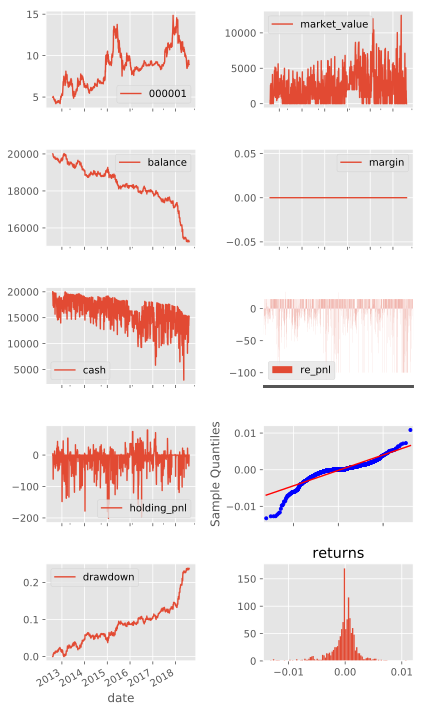

In [4]:
go.output.plot('000001')

In [5]:
# 检查自己需要的模块是否正确导入
go.output.show_setting()

+--------------------+
|readers_1  |  000001|
|readers_2  |  000002|
+--------------------+
+--------------------+
|cleaners_1  |  SMA_1|
|cleaners_2  |  SMA_2|
+--------------------+
+--------------------------+
|strategy_1  |  SmaStrategy|
+--------------------------+
+-------------------------+
|brokers_1  |  StockBroker|
+-------------------------+
+-----------------------------------------------+
|risk_managers_1  |  StockLimitFilterRiskManager|
+-----------------------------------------------+
+-----------------------------+
|recorders_1  |  StockRecorder|
+-----------------------------+


In [6]:
# go.output.analysis.detail_summary()
# go.output.analysis.general_summary()
go.output.summary2()

+---------------------------------------+
|Start_date                |  2012-08-07|
|End_date                  |  2018-08-07|
|Initial_balance           |   $20000.00|
|End_balance               |   $15261.53|
|Total_return              |     -23.69%|
|Total_net_pnl             |   -$4738.47|
|Total_commission          |    $2526.57|
|Total_trading_days        |   1566 days|
|Max_drawdown              |      23.84%|
|Max_drawdown_date         |  2018-07-20|
|Max_duration_in_drawdown  |   1434 days|
|Max_margin                |       $0.00|
|Max_win_holding_pnl       |      $79.90|
|Max_loss_holding_pnl      |    -$201.10|
|Sharpe_ratio              |       -1.29|
|Sortino_ratio             |       -1.24|
|Number_of_trades          |        1357|
|Number_of_daily_trades    |        0.87|
|Number_of_profit_days     |   1566 days|
|Number_of_loss_days       |      0 days|
|Avg_daily_pnl             |      -$3.03|
|Avg_daily_commission      |       $1.61|
|Avg_daily_return          |      

In [7]:
go.output.trade_log().head()

,ticker,entry_date,entry_price,entry_type,size,exit_date,exit_price,exit_type,pl_points,re_pnl,comm,holding_period,drawdown,run_up,returns_diff
0,000001,2012-08-07 00:00:00,5.015,Market Buy,100,2012-08-08 15:00:00,4.968,Market Sell,-0.047,-4.7,0.80240,"1 day, 15:00:00",0.009970,0.003988,-0.009372
1,000002,2012-08-09 00:00:00,7.207,Market Buy,100,2012-08-14 15:00:00,6.804,Market Sell,-0.403,-40.3,1.15312,"5 days, 15:00:00",0.069377,0.016789,-0.055918
2,000002,2012-08-10 00:00:00,7.255,Market Buy,100,2012-08-15 15:00:00,6.860,Market Sell,-0.395,-39.5,1.16080,"5 days, 15:00:00",0.075534,0.000000,-0.054445
3,000002,2012-08-13 00:00:00,7.062,Market Buy,100,2012-08-16 15:00:00,6.868,Market Sell,-0.194,-19.4,1.12992,"3 days, 15:00:00",0.050269,0.000000,-0.027471
4,000001,2012-08-13 00:00:00,5.018,Market Buy,100,2012-08-20 15:00:00,4.982,Market Sell,-0.036,-3.6,0.80288,"7 days, 15:00:00",0.024512,0.013352,-0.007174


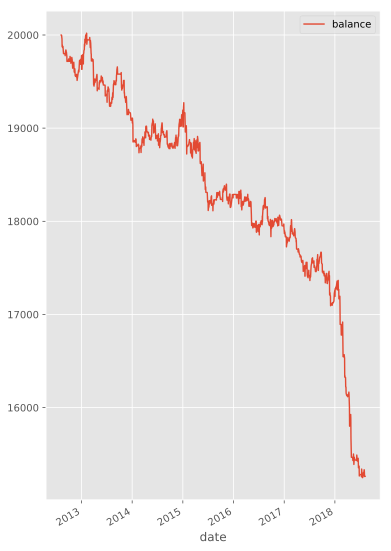

In [8]:
# 回测后各原始结果都在recorder中, 本质都是字典,继承自UserDict

# go.env.recorder.holding_pnl
# go.env.recorder.realized_pnl
# go.env.recorder.commission
# go.env.recorder.market_value
# go.env.recorder.margin
# go.env.recorder.position
# go.env.recorder.avg_price
# go.env.recorder.cash
# go.env.recorder.frozen_cash
# go.env.recorder.balance

# 提供一下两种方法
# go.env.recorder.balance.dataframe()
go.env.recorder.balance.plot()

In [9]:
# 若打开保存原始signal开关, 回测厚可得到原始列表
go.save_original_signal()
go.sunny(summary=False,show_process=False)

正在初始化OnePy
=============== OnePy初始化成功！ ===============
开始寻找OnePiece之旅~~~


In [10]:
# 一系列原始signals列表
# go.env.signals_pending[0]
# go.env.signals_trigger[0]
# go.env.signals_cancel[0]
go.env.signals_normal[0]

Signal(strategy_name='SmaStrategy', action_type=<ActionType.Buy: 'Buy'>, size=100, ticker='000001', takeprofit=15, takeprofit_pct=None, stoploss=100, stoploss_pct=None, trailingstop=None, trailingstop_pct=None, price=None, price_pct=None, signal_id=1, datetime='2012-08-07 00:00:00')

In [12]:
# Hope you can find your OnePiece ：）